In [1]:
import uproot
import matplotlib
import matplotlib.pyplot as plt
import awkward as ak
import hist
import numpy as np
from event_display import gdml_read_ecal_info
import os
import pandas as pd

%matplotlib inline
matplotlib.rc("figure", dpi=200)

dir_path = os.path.dirname(os.path.realpath("__file__"))
print(f"Believed path is: {dir_path}")

Believed path is: /home/romanov/eic/kak-bog-cherepahu/simulation


In [3]:
def read_modules_de(file_name, entry_start = 0, entry_stop = 100000):
    tree = uproot.open(file_name)["tree_crystals"]
    module_de_flat = tree['edep'].array(entry_start=entry_start, entry_stop=entry_stop).to_numpy()
    return module_de_flat

In [7]:
pi_de_flat = read_modules_de("/home/romanov/eic/kak-bog-cherepahu/glass-prototype/cmake-build-debug/output/SciGlass-4-1-L-13x13-20x20x200mm-1.5GeV-10000events-pi--40mm-R1450.root")
pi_sum_e = np.sum(pi_de_flat, axis=1)

e_de_flat = read_modules_de(f"/home/romanov/eic/kak-bog-cherepahu/glass-prototype/cmake-build-debug/output/SciGlass-4-1-L-13x13-20x20x200mm-1.5GeV-10000events-e--40mm-R1450.root")
e_sum_e = np.sum(e_de_flat, axis=1)

(array([  2.,   1.,   0.,   1.,   1.,   3.,   2.,   4.,   5.,   3.,   7.,
          6.,   9.,   4.,  17.,  11.,  15.,  27.,  24.,  29.,  24.,  30.,
         40.,  43.,  57.,  72.,  89.,  86., 117., 136., 189., 212., 254.,
        308., 372., 450., 507., 553., 641., 741., 780., 883., 861., 753.,
        619., 487., 322., 135.,  58.,  10.]),
 array([0.06720749, 0.08476655, 0.1023256 , 0.11988465, 0.1374437 ,
        0.15500275, 0.17256181, 0.19012086, 0.20767991, 0.22523896,
        0.24279802, 0.26035707, 0.27791612, 0.29547517, 0.31303422,
        0.33059328, 0.34815233, 0.36571138, 0.38327043, 0.40082949,
        0.41838854, 0.43594759, 0.45350664, 0.47106569, 0.48862475,
        0.5061838 , 0.52374285, 0.5413019 , 0.55886096, 0.57642001,
        0.59397906, 0.61153811, 0.62909716, 0.64665622, 0.66421527,
        0.68177432, 0.69933337, 0.71689243, 0.73445148, 0.75201053,
        0.76956958, 0.78712863, 0.80468769, 0.82224674, 0.83980579,
        0.85736484, 0.8749239 , 0.89248295, 0.

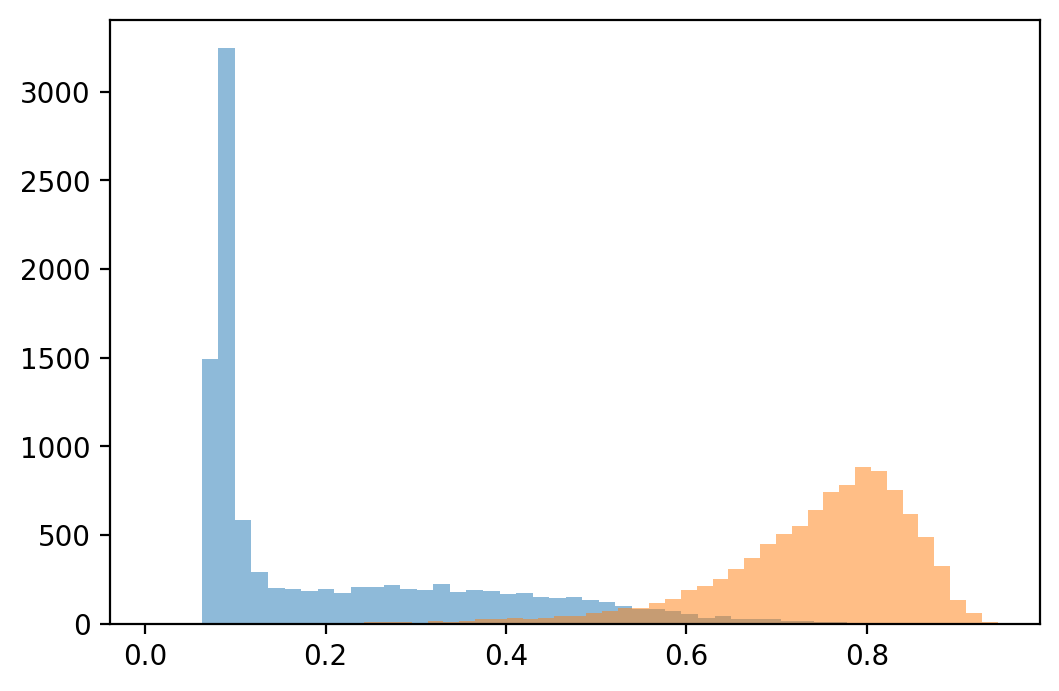

In [10]:
fig, axs = plt.subplots()

# We can set the number of bins with the *bins* keyword argument.
axs.hist(pi_sum_e/1500, bins=50, alpha = 0.5)
axs.hist(e_sum_e/1500, bins=50, alpha = 0.5)